## Assignment 4: Drought Working Group Experiments

This notebook makes a 10-panel plot for Assignment 3 with the drought working group experiments.  In this example, I make the plot for all students, but there are some duplicates, so its only necessary to make an 8-panel plot.

* Reads in all the DWG experiments
* Calculates the mean over all years for T and P for each experiment.
* Selects data only for the US
* Takes the difference between the annual mean of each experiment and the climatology experiments
* Makes a 2-panel plot of precip difference and a 2-panel plot of temperature difference

#### Import Statements

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

#### Set files and paths

In [2]:
path='/glade/scratch/'

# Location and name of climatology case
climodir='cstan'
climocase='dwg'
climoexp='PnAn'

# Location and names of experiments

userdirs=['averstynen','ldoyle']

usercases=['testatmF','homework4']

expnames=['PwAw','PcAc']

### Read in the Climatology Experiment

In [3]:
climo_fnames=path+climodir+'/archive/'+climocase+'/atm/hist/'+climocase+'.cam.h0.*.nc'
ds_climo=xr.open_mfdataset(climo_fnames,combine='nested',concat_dim='time',parallel=True).mean(dim='time')
ds_climo

<xarray.Dataset>
Dimensions:           (lat: 96, lon: 144, lev: 32, ilev: 33)
Coordinates:
  * lat               (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon               (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lev               (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev              (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
Data variables: (12/386)
    gw                (lat) float64 dask.array<chunksize=(96,), meta=np.ndarray>
    hyam              (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    hybm              (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    P0                float64 1e+05
    hyai              (ilev) float64 dask.array<chunksize=(33,), meta=np.ndarray>
    hybi              (ilev) float64 dask.array<chunksize=(33,), meta=np.ndarray>
    ...                ...
    soa_c1            (lev, lat, lon) float32 dask.array<chunksize=(32, 96, 144), meta=np.ndarray>
    soa_c1DDF         (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    soa_c1SFWET       (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    soa_c2            (lev, lat, lon) float32 dask.array<chunksize=(32, 96, 144), meta=np.ndarray>
    soa_c2DDF         (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    soa_c2SFWET       (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>

In [4]:
climo_TEMP=ds_climo['TREFHT']
climo_PRECIP=ds_climo['PRECC']+ds_climo['PRECL']

In [5]:
diff_TEMP_list=[]
diff_PRECIP_list=[]

for i,(userdir,usercase,expname) in enumerate(zip(userdirs,usercases,expnames)):
    fnames=path+userdir+'/archive/'+usercase+'/atm/hist/'+usercase+'.cam.h0.*.nc'
    print(fnames)
    ds=xr.open_mfdataset(fnames,combine='nested',concat_dim='time',parallel=True).mean(dim='time')

    exp_TEMP=ds['TREFHT'].sel(lat=slice(20,60),lon=slice(210,300))
    exp_PRECIP=(ds['PRECC']+ds['PRECL']).sel(lat=slice(20,60),lon=slice(210,300))
    diff_TEMP=exp_TEMP-climo_TEMP
    diff_PRECIP=exp_PRECIP-climo_PRECIP
    
    diff_TEMP_list.append(diff_TEMP)
    diff_PRECIP_list.append(diff_PRECIP)

/glade/scratch/averstynen/archive/testatmF/atm/hist/testatmF.cam.h0.*.nc
/glade/scratch/ldoyle/archive/homework4/atm/hist/homework4.cam.h0.*.nc


In [6]:
print(len(diff_TEMP_list))

2


### Plot the Multi-panel plot for Temperature

Note I plotted all experiments from all students.

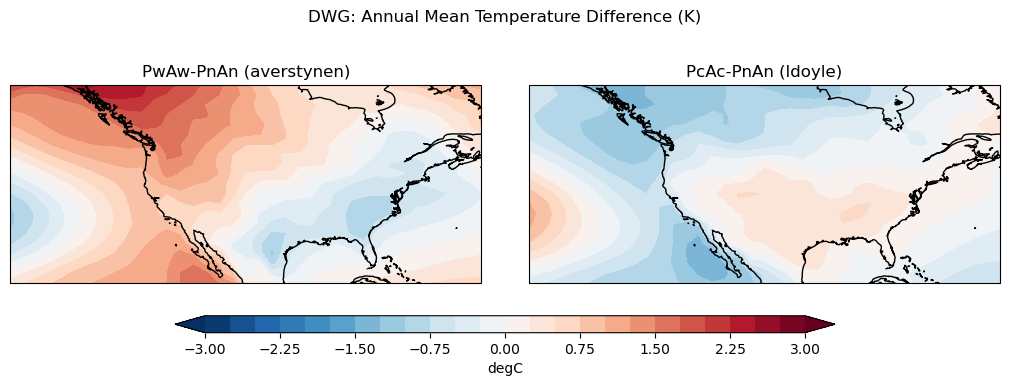

In [7]:
clevs=np.arange(-3,3.25,0.25)
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
axs=axs.flatten()

for i,exp in enumerate(diff_TEMP_list):
    cs=axs[i].contourf(exp_TEMP['lon'],exp_TEMP['lat'],
                       exp,clevs,
                       transform = ccrs.PlateCarree(),
                       cmap='RdBu_r',extend='both')
    axs[i].coastlines()
    axs[i].set_title(expnames[i]+'-PnAn ('+userdirs[i]+')')

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.65, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.6, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='degC')

# Add a big title at the top
plt.suptitle('DWG: Annual Mean Temperature Difference (K)')

plt.savefig('DWG_TEMP.png')

### Plot the Multi-panel plot for Precipitation

Note I plotted all experiments from all students.

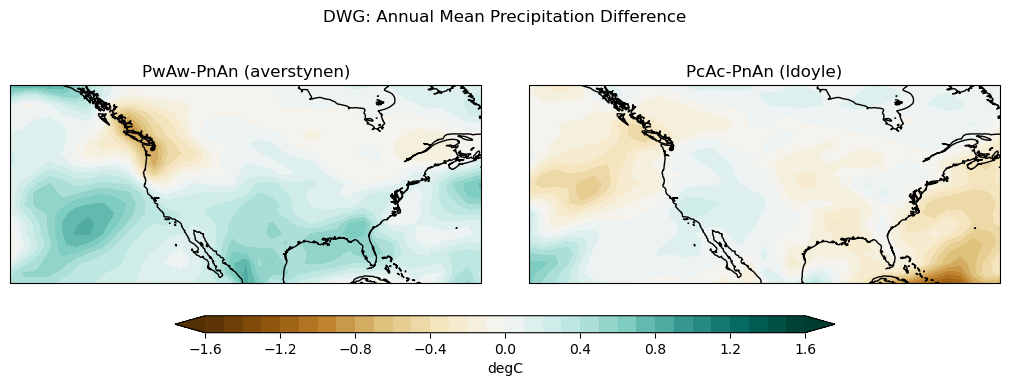

In [8]:
clevs=np.arange(-1.6,1.7,0.1)
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
axs=axs.flatten()

# Units conversion from m/s to mm/day
sf=86400*1000

for i,exp in enumerate(diff_PRECIP_list):
    cs=axs[i].contourf(exp_PRECIP['lon'],exp_PRECIP['lat'],
                       exp*sf,clevs,
                       transform = ccrs.PlateCarree(),
                       cmap='BrBG',extend='both')
    axs[i].coastlines()
    axs[i].set_title(expnames[i]+'-PnAn ('+userdirs[i]+')')

    
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.65, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.6, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='degC')

# Add a big title at the top
plt.suptitle('DWG: Annual Mean Precipitation Difference')

plt.savefig('DWG_PRECIP.png')